# TP2 : Learning by multi-layer perceptron (MLP) with sklearn

---



In [0]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import time 

from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

## Load MNIST dataset

In [0]:
# import data
mnist = fetch_openml('mnist_784')

In [4]:
images = mnist.data.reshape((-1,28,28))
data = mnist.data
labels = mnist.target
print("Shape of training images : ", images.shape)
print("Shape of training data : ", data.shape)
print("Shape of label : ", labels.shape)

Shape of training images :  (70000, 28, 28)
Shape of training data :  (70000, 784)
Shape of label :  (70000,)


In [5]:
target_list = np.unique(mnist.target)
print(target_list)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Normalize data

In [0]:
data = data / 255

## Split training & test set

In [7]:
X_train, X_test = data[:49000], data[49000:]
y_train, y_test = labels[:49000], labels[49000:]
print("Traning data shape : ", X_train.shape)
print("Traning target shape : ", y_train.shape)
print("Testing data shape : ", X_test.shape)
print("Testing target shape : ", y_test.shape)

Traning data shape :  (49000, 784)
Traning target shape :  (49000,)
Testing data shape :  (21000, 784)
Testing target shape :  (21000,)


## Build a simple classifier

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,verbose=1)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.58593285
Iteration 2, loss = 0.26452278
Iteration 3, loss = 0.21139349
Iteration 4, loss = 0.17897855
Iteration 5, loss = 0.15731783
Iteration 6, loss = 0.13894773
Iteration 7, loss = 0.12565064
Iteration 8, loss = 0.11476678
Iteration 9, loss = 0.10531966
Iteration 10, loss = 0.09777866
Iteration 11, loss = 0.09099122
Iteration 12, loss = 0.08408523
Iteration 13, loss = 0.07815758
Iteration 14, loss = 0.07352066
Iteration 15, loss = 0.06885711
Iteration 16, loss = 0.06515906
Iteration 17, loss = 0.06104012
Iteration 18, loss = 0.05702792
Iteration 19, loss = 0.05448998
Iteration 20, loss = 0.05084019
Iteration 21, loss = 0.04779172
Iteration 22, loss = 0.04540233
Iteration 23, loss = 0.04280922
Iteration 24, loss = 0.04047566
Iteration 25, loss = 0.03848324
Iteration 26, loss = 0.03560978
Iteration 27, loss = 0.03382055
Iteration 28, loss = 0.03173013
Iteration 29, loss = 0.03009430
Iteration 30, loss = 0.02863329


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.995020
Test set score: 0.968667


## Test prediction

Pred : 4/score : 0.99987167794302


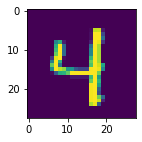

Pred : 9/score : 0.9981267519439669


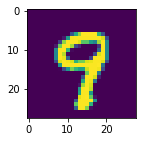

Pred : 0/score : 0.9999995546117136


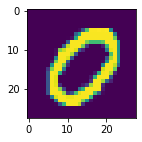

Pred : 6/score : 0.9994800700228692


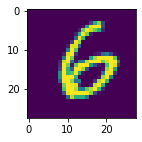

Pred : 0/score : 0.9982956888551822


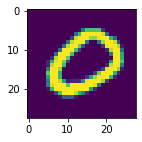

In [0]:
for i in range(5):
    plt.figure(figsize=(3,2))
    idx = np.random.randint(len(X_test))
    y_pred = mlp.predict([X_test[idx]])
    y_proba = np.max(mlp.predict_proba([X_test[idx]]))
    plt.imshow(X_test[idx].reshape(28,28))
    print("Pred : {}/score : {}".format(y_pred[0],y_proba))
    plt.show()

## Compute score

In [0]:
y_pred = mlp.predict(X_test)
precision_score(y_test,y_pred,labels = target_list,average='micro')

0.9686666666666667

## Modify number of layers

In [0]:
layers_sizes = []
for i in range(20):
  print("=== {} hidden layer(s) ====".format(i+1))
  layers_sizes.append(50)
  mlp = MLPClassifier(hidden_layer_sizes=layers_sizes,max_iter=30,verbose=0)
  start = time.process_time()
  mlp.fit(X_train,y_train)
  end = time.process_time()
  print("Training time : ",end-start)
  print("Training set score: %f" % mlp.score(X_train, y_train))
  print("Test set score: %f" % mlp.score(X_test, y_test))

=== 1 hidden layer(s) ====


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time :  47.50479595899999
Training set score: 0.996041
Test set score: 0.970762
=== 2 hidden layer(s) ====


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time :  53.95896328399999
Training set score: 0.997898
Test set score: 0.969429
=== 3 hidden layer(s) ====


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training time :  60.27842580599999
Training set score: 0.997122
Test set score: 0.970190
=== 4 hidden layer(s) ====


## Study other optimization algos : L-BFGS, SGD, Adam

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,verbose=True,solver='lbfgs')
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.917306
Test set score: 0.920238


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,solver='sgd',verbose=True)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.64817576
Iteration 2, loss = 0.86695086
Iteration 3, loss = 0.62827883
Iteration 4, loss = 0.52843789
Iteration 5, loss = 0.47341429
Iteration 6, loss = 0.43804882
Iteration 7, loss = 0.41285223
Iteration 8, loss = 0.39366836
Iteration 9, loss = 0.37837115
Iteration 10, loss = 0.36571329
Iteration 11, loss = 0.35506193
Iteration 12, loss = 0.34569112
Iteration 13, loss = 0.33742258
Iteration 14, loss = 0.33004403
Iteration 15, loss = 0.32319463
Iteration 16, loss = 0.31713651
Iteration 17, loss = 0.31132721
Iteration 18, loss = 0.30616101
Iteration 19, loss = 0.30110128
Iteration 20, loss = 0.29633107
Iteration 21, loss = 0.29195572
Iteration 22, loss = 0.28773042
Iteration 23, loss = 0.28380766
Iteration 24, loss = 0.28006604
Iteration 25, loss = 0.27631521
Iteration 26, loss = 0.27287448
Iteration 27, loss = 0.26946764
Iteration 28, loss = 0.26632681
Iteration 29, loss = 0.26319034
Iteration 30, loss = 0.26027169


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.927204
Test set score: 0.929571


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,solver='adam',verbose=True)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.57692196
Iteration 2, loss = 0.26174216
Iteration 3, loss = 0.21268104
Iteration 4, loss = 0.18181131
Iteration 5, loss = 0.15894930
Iteration 6, loss = 0.14113967
Iteration 7, loss = 0.12634978
Iteration 8, loss = 0.11509928
Iteration 9, loss = 0.10350043
Iteration 10, loss = 0.09545217
Iteration 11, loss = 0.08902139
Iteration 12, loss = 0.08237596
Iteration 13, loss = 0.07663220
Iteration 14, loss = 0.07114522
Iteration 15, loss = 0.06722030
Iteration 16, loss = 0.06286350
Iteration 17, loss = 0.05838204
Iteration 18, loss = 0.05480119
Iteration 19, loss = 0.05168474
Iteration 20, loss = 0.04847602
Iteration 21, loss = 0.04562188
Iteration 22, loss = 0.04345393
Iteration 23, loss = 0.04019998
Iteration 24, loss = 0.03862382
Iteration 25, loss = 0.03574070
Iteration 26, loss = 0.03373834
Iteration 27, loss = 0.03204073
Iteration 28, loss = 0.03031278
Iteration 29, loss = 0.02830926
Iteration 30, loss = 0.02639710


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.995306
Test set score: 0.969905


## Test activation function : identity, logistic, tanh, relu

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,activation='identity',solver='adam',verbose=False)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.934694
Test set score: 0.925571


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,activation='logistic',solver='adam',verbose=False)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.984184
Test set score: 0.966810


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,activation='tanh',solver='adam',verbose=False)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.996510
Test set score: 0.969905


In [0]:
mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,activation='relu',solver='adam',verbose=False)
mlp.fit(X_train,y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.996327
Test set score: 0.970952


## L2 Regularization - Test alpha

In [0]:
for i in range(5):
    alpha = 0.1 ** (i+1)
    print("**** Alpha = {} ****".format(alpha))
    mlp = MLPClassifier(hidden_layer_sizes=50,max_iter=30,activation='relu',solver='adam',verbose=False,alpha=alpha)
    mlp.fit(X_train,y_train)
    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Test set score: %f" % mlp.score(X_test, y_test))

**** Alpha = 0.1 ****


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986959
Test set score: 0.970905
**** Alpha = 0.010000000000000002 ****


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.993878
Test set score: 0.970286
**** Alpha = 0.0010000000000000002 ****


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.995163
Test set score: 0.970000
**** Alpha = 0.00010000000000000002 ****


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.996918
Test set score: 0.973476
**** Alpha = 1.0000000000000003e-05 ****


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.995469
Test set score: 0.968952


## Best Model ??